# 자연어 처리 연산
1. Edit Distance : 2개의 단어가 얼마나 다른지
    - Cat / Hat : Edit Distance 1
    - 단어의 유사성 파악 (규칙 기반)

2. Stemming : 어간 추출, 단어의 본래 형태로 추출 (형용사 -> 동사)
    - going -> go / Computer -> Compute
    - 문장의 의도를 파악하는 기술(규칙 기반 -> 마이닝)

3. Lemmatization : 문장속에서 다양한 형태로 활용된 단어의 표제어를 찾는 작업
    - 표제어(lemma) : 사전에 등록되어 있는 단어
    - 단어의 원형을 추출 / 문서 분석 

In [2]:
!pip install --user nltk

In [3]:
# nltk (natural language toolkit) : 영어의 기호 및 통계 기반의 자연어 처리 라이브러리
from nltk.metrics import edit_distance

In [4]:
edit_distance('cat', 'hat')

1

In [5]:
from nltk.stem import PorterStemmer

In [6]:
pst = PorterStemmer()
pst.stem('Going')

'go'

In [7]:
from nltk.stem import WordNetLemmatizer # WordNet : 자연어 처리 사전

In [8]:
import nltk

In [9]:
# nltk.download()

In [10]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\DMC
[nltk_data]     CONET\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\DMC
[nltk_data]     CONET\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
# wnl = WordNetLemmatizer()
# wnl.lemmatize('ate', pos='v')

# 1. 형태소 분석

1. 형태소 (POS, Part of Speech) 분석 (Morphological) : 
    - 형태소 : 말의 가장 작은 단위
    - 문장을 최소 단위로 나누어 품사(동사, 명사, 형용사, 부사, 조사...)를 부착 작업
    - 형태소 분석을 통해 문장을 나누어, 언어의 사전으로 부터 정보를 끌어오는 작업

    - Tokenizing (토큰화) + Tagging 
        - Tokenizing : 텍스트를 특정 단위로 쪼개는 작업
            - 어절 분리(Word Separation)
            - 문장 분리(Sentence Separation)
        - Tagging : 품사를 부착하는 과정 

    -> 워드클라우드 / 유사도 분석

In [12]:
# 1-1. Tokenizing(문장분리 / 어절분리)
word1 = 'Show me the Money~'
nltk.word_tokenize(word1)   # nltk : str 형태로 사용

['Show', 'me', 'the', 'Money~']

In [13]:
sentance1 = 'My Name is data station. what your name?'
nltk.sent_tokenize(sentance1)

['My Name is data station.', 'what your name?']

In [14]:
# 1-2. 태깅
fox1 = '''
Dog goes "woof"
Cat goes "meow"
Bird goes "tweet"
And mouse goes "squeek"
Cow goes "moo"
Frog goes "croak"
And the elephant goes "toot"
Ducks say "quack"
And fish go "blub"
And the seal goes "ow ow ow"
But there's one sound
That no one knows
What does the fox say?
"Ring-ding-ding-ding-dingeringeding!
Gering-ding-ding-ding-dingeringeding!
Gering-ding-ding-ding-dingeringeding!"
What the fox say?
"Wa-pa-pa-pa-pa-pa-pow!
Wa-pa-pa-pa-pa-pa-pow!
Wa-pa-pa-pa-pa-pa-pow!"
What the fox say?
"Hatee-hatee-hatee-ho!
Hatee-hatee-hatee-ho!
Hatee-hatee-hatee-ho!"
What the fox say?
"Joff-tchoff-tchoffo-tchoffo-tchoff!
Tchoff-tchoff-tchoffo-tchoffo-tchoff!
Joff-tchoff-tchoffo-tchoffo-tchoff!"
What the fox say?
Big blue eyes
Pointy nose
Chasing mice
And digging holes
Tiny paws
Up the hill
Suddenly you're standing still
Your fur is red
So beautiful
Like an angel in disguise
But if you meet
A friendly horse
Will you communicate by
Mo-o-o-o-orse?
Mo-o-o-o-orse?
Mo-o-o-o-orse?
How will you speak to that
Ho-o-o-o-orse?
Ho-o-o-o-orse?
Ho-o-o-o-orse?
What does the fox say?
"Jacha-chacha-chacha-chow!
Chacha-chacha-chacha-chow!
Chacha-chacha-chacha-chow!"
What the fox say?
"Fraka-kaka-kaka-kaka-kow!
Fraka-kaka-kaka-kaka-kow!
Fraka-kaka-kaka-kaka-kow!"
What the fox say?
"A-hee-ahee ha-hee!
A-hee-ahee ha-hee!
A-hee-ahee ha-hee!"
What the fox say?
"A-oo-oo-oo-ooo!
Woo-oo-oo-ooo!"
What does the fox say?
The secret of the fox
Ancient mystery
Somewhere deep in the woods
I know you're hiding
What is your sound?
Will we ever know?
Will always be a mystery
What do you say?
You're my guardian angel
Hiding in the woods
What is your sound?
(Wa-wa-way-do, wub-wid-bid-dum-way-do, wa-wa-way-do)
Will we ever know? (Bay-budabud-dum-bam)
I want to (Mama-dum-day-do) I want to, I want to know!
(Abay-ba-da bum-bum bay-do)
'''

In [15]:
nltk.download('averaged_perceptron_tagger') # 형태소 태그 사전

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DMC CONET\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [16]:
word_list = nltk.word_tokenize(fox1) # 어절 분리
nltk.pos_tag(word_list) # 태깅

[('Dog', 'NNP'),
 ('goes', 'VBZ'),
 ('``', '``'),
 ('woof', 'JJ'),
 ("''", "''"),
 ('Cat', 'NNP'),
 ('goes', 'VBZ'),
 ('``', '``'),
 ('meow', 'JJ'),
 ("''", "''"),
 ('Bird', 'NNP'),
 ('goes', 'VBZ'),
 ('``', '``'),
 ('tweet', 'NN'),
 ("''", "''"),
 ('And', 'CC'),
 ('mouse', 'VB'),
 ('goes', 'VBZ'),
 ('``', '``'),
 ('squeek', 'JJ'),
 ("''", "''"),
 ('Cow', 'NNP'),
 ('goes', 'VBZ'),
 ('``', '``'),
 ('moo', 'JJ'),
 ("''", "''"),
 ('Frog', 'NNP'),
 ('goes', 'VBZ'),
 ('``', '``'),
 ('croak', 'NN'),
 ("''", "''"),
 ('And', 'CC'),
 ('the', 'DT'),
 ('elephant', 'NN'),
 ('goes', 'VBZ'),
 ('``', '``'),
 ('toot', 'JJ'),
 ("''", "''"),
 ('Ducks', 'NNS'),
 ('say', 'VBP'),
 ('``', '``'),
 ('quack', 'NN'),
 ("''", "''"),
 ('And', 'CC'),
 ('fish', 'VB'),
 ('go', 'VBP'),
 ('``', '``'),
 ('blub', 'NN'),
 ("''", "''"),
 ('And', 'CC'),
 ('the', 'DT'),
 ('seal', 'NN'),
 ('goes', 'VBZ'),
 ('``', '``'),
 ('ow', 'JJ'),
 ('ow', 'NN'),
 ('ow', 'NN'),
 ("''", "''"),
 ('But', 'CC'),
 ('there', 'EX'),
 ("'s", 'VBZ

- 개체명 인식(Named-Entity Recognition) : 
    - 명사로 태깅된 형태소 중, 지역명/조직/장소와 같은 고유명사를 따로 구분하여 문장의 맥락을 이해, 동의어를 구분
    - Named Entity : 개체명(지역명/조직/장소와 같은 개체)

2. 불용어 처리(Stopword) : 관사/전치사/조사/접속사 등의 의미없는 단어를 찾아 처리하는 작업
    - 문장을 검색 / 분해 / 빈도수 파악 / 의미파악 / 텍스트분류 / ...
    
    - 야 ㅋㅋㅋㅋ 오늘 강사 복장 뭐임? 농부임? ㅋㅋㅋㅋ
    
    - 너 어제 빌려간 펜 돌려받을 수 있을까?
    - 응 ㅋㅋ 나중에 줄게 ㅋㅋ

# Konlpy

In [17]:
!pip install --user Jpype1
!pip install --user konlpy

- Okt Class : 트위터에서 추출된 텍스트로 만든 형태소 분석기
- KKma Class : 서울대 연구실에서 제작 (문서/논문)
- Hannanum ...

In [18]:
import konlpy

In [19]:
from konlpy.tag import Okt

In [20]:
okt = Okt() # 형태소 분석

In [21]:
text3 = '''맷돌 손잡이를 어이라 그래요 어이. 
맷돌에 뭘 갈려고 집어넣고 맷돌을 돌리려고 하는데? 어라? 손잡이가 빠졌네?'''

In [22]:
text_token1 = okt.morphs(text3) # 어절 분리
okt.pos(text3) # 어절 분리 + 태깅

[('맷돌', 'Noun'),
 ('손잡이', 'Noun'),
 ('를', 'Josa'),
 ('어이', 'Noun'),
 ('라', 'Josa'),
 ('그래요', 'Adjective'),
 ('어이', 'Noun'),
 ('.', 'Punctuation'),
 ('맷돌', 'Noun'),
 ('에', 'Josa'),
 ('뭘', 'Noun'),
 ('갈려고', 'Verb'),
 ('집어넣고', 'Verb'),
 ('맷돌', 'Noun'),
 ('을', 'Josa'),
 ('돌리려고', 'Verb'),
 ('하는데', 'Verb'),
 ('?', 'Punctuation'),
 ('어라', 'Verb'),
 ('?', 'Punctuation'),
 ('손잡이', 'Noun'),
 ('가', 'Josa'),
 ('빠졌네', 'Verb'),
 ('?', 'Punctuation')]

In [23]:
import pandas as pd

In [24]:
df_pos1 = pd.DataFrame(okt.pos(text3), columns=['형태소', '품사'])
df_pos1

,형태소,품사
0,맷돌,Noun
1,손잡이,Noun
2,를,Josa
3,어이,Noun
4,라,Josa
5,그래요,Adjective
6,어이,Noun
7,.,Punctuation
8,맷돌,Noun
9,에,Josa


In [25]:
# !pip install --user seaborn

In [26]:
import seaborn as sns

<AxesSubplot:xlabel='품사', ylabel='count'>

c:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  func(*args, **kwargs)
c:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
c:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


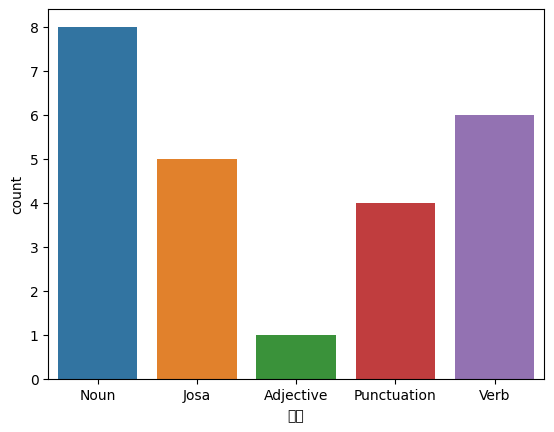

In [27]:
sns.countplot(data=df_pos1, x='품사')

In [28]:
# 기업평가 데이터 형태소 분석
df1 = pd.read_csv('배달의_민족_기업평가.csv')
df1.head()

,Unnamed: 0,직종,재직여부,지역,작성시간,한줄평,기업장점,기업단점,바라는점,기업성장여부,기업추천여부
0,0,경영/기획/컨설팅,현직원,서울,2019. 01. 03,"""무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...","1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",빠르게 성장하는회사의 특징! 바뀌는 업무가 많습니다. 하루하루 다이나믹해요.,향후 회사가 어떤 방향으로 성장해야 할지 지속적으로 고민하시고 공유해주셔서 감사합니...,성장,추천
1,1,경영/기획/컨설팅,현직원,서울,2019. 03. 08,"""체계적인 업무분담으로 자율성을 강조하며 사내분위기로 실무를 극대화할 수 있는 좋은...","그 누구의 눈치도 보지 않으며, 자유로운 의사소통에 내부 분위기, 팀별로 케바케 이...","팀별로 케바케, 외근 및 인테리어관련 부서는 낮과 밤이 없어보이지만 그들에게도 얼굴...","너무 좋아서 변하지 않을까 걱정이 됩니다\n지금처럼 고객, 파트너사, 직원들을 생각...",성장,추천
2,2,인사/총무,현직원,서울,2019. 01. 25,"""개발자가 대우받으며 일할 수 있는곳, 워라밸 좋음""","도서구입비 무제한 지원, 주 35시간 근무, 월요일은 오후1시 출근,",아직 커가는 회사라서 이것저것 세팅해 나가는 단계. 그러나 세팅해 나갈때에도 경쟁사...,없다. 비전이 뚜렷하고 가고자하는 방향이 있어 좋음.,성장,추천
3,3,전문직,전직원,서울,2019. 01. 15,"""일하기 좋은 회사. 누구라도 잘 알고 있는 회사인만큼 실제로도 매우 만족스러운 회...",자율적인 분위기와 좋은 복지를 많이 갖춘 곳. 좋은 사람들이 많이 모여있고 그 안에...,팀내 팀장과의 소통이 많이 있지 않았던터라 팀끼리 협업이 부족했다. 속해있던 팀 내...,조금 더 폭넓은 관심이 필요 할 것 같다. 이래도 되나? 싶을 정도에 사람이 많이 ...,성장,추천
4,4,경영/기획/컨설팅,현직원,서울,2019. 01. 03,"""무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...","1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",빠르게 성장하는회사의 특징! 바뀌는 업무가 많습니다. 하루하루 다이나믹해요.,향후 회사가 어떤 방향으로 성장해야 할지 지속적으로 고민하시고 공유해주셔서 감사합니...,성장,추천


In [29]:
pd.DataFrame(okt.pos(df1['한줄평'].values.tolist()[0]), columns=['형태소', '품사'])

,형태소,품사
0,"""",Punctuation
1,무섭도록,Adjective
2,빠른,Adjective
3,속도,Noun
4,로,Josa
5,성장,Noun
6,중,Suffix
7,인,Josa
8,대한민국,Noun
9,스타트업,Noun


In [30]:
df1_POS = pd.DataFrame()
for i in range(len(df1['한줄평'])) : 
    df_n = pd.DataFrame(okt.pos(df1['한줄평'].values.tolist()[i]))
    df1_POS = pd.concat([df1_POS, df_n])

df1_POS1 = df1_POS.rename(columns={0:'형태소', 1:'품사'})

In [31]:
df1_POS1['품사'].value_counts()

Noun              1280
Josa               542
Punctuation        429
Adjective          331
Verb               321
Suffix              94
Adverb              52
Modifier            31
Foreign             22
Determiner          13
Alpha               10
Conjunction          9
Number               7
VerbPrefix           5
KoreanParticle       3
Name: 품사, dtype: int64

In [32]:
cond1 = (df1_POS1['품사']=='Noun')
df1_POS1.loc[cond1]

,형태소,품사
3,속도,Noun
5,성장,Noun
8,대한민국,Noun
9,스타트업,Noun
11,상징,Noun
...,...,...
13,진짜,Noun
16,아래,Noun
18,일,Noun
21,수,Noun


In [33]:
!pip install --user wordcloud

In [34]:
from wordcloud import WordCloud

In [35]:
df1_N = df1_POS1.loc[cond1]

In [36]:
wc_img = WordCloud(background_color='white', width=800, height=800,
           font_path='Malgun.ttf').generate(' '.join(df1_N['형태소']))

In [37]:
import matplotlib.pyplot as plt

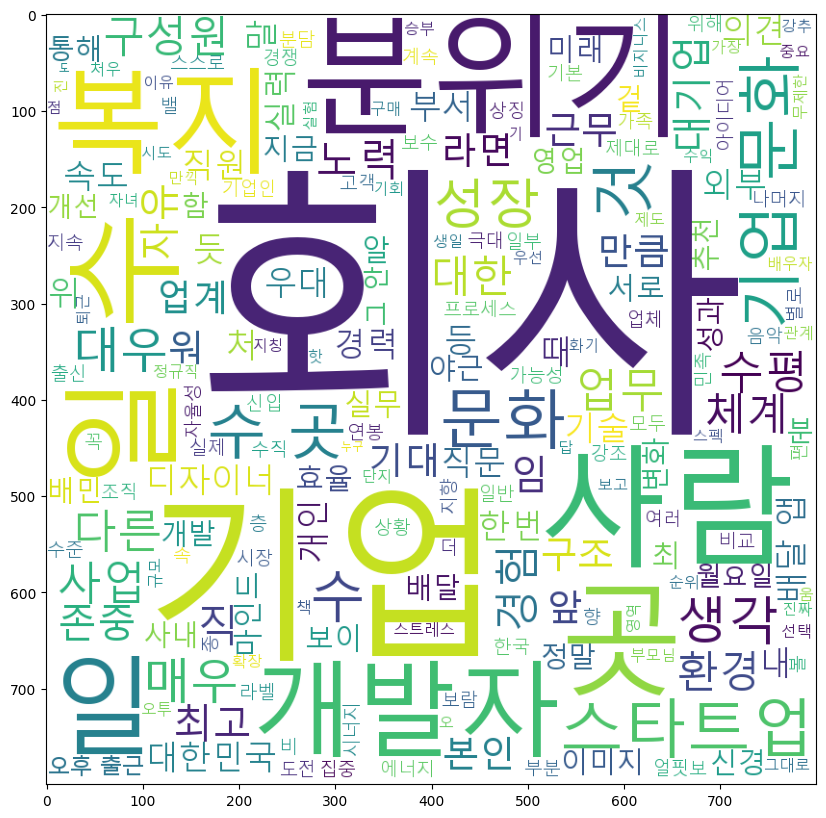

In [38]:
plt.figure(figsize=[10,10])
plt.imshow(wc_img)
plt.show()

# Mission

1. df1에서 '기업성장여부'의 항목 별 빈도수를 계산
2. df1에서 '기업성장여부'가 '성장'으로 평가한 데이터를 뽑아 df1_positive 선언
3. df1_positive의 '한줄평'을 형태소 분석하여, '명사'에 대한 워드클라우드 생성
4. df1에서 '재직여부'에서 '현직자'에 해당하는 데이터만 추출하여, '바라는점'이라는 항목에 대한 '명사' 워드 클라우드 생성

## 강사님 풀이

In [39]:
# 1. df1에서 '기업성장여부'의 항목 별 빈도수를 계산
df1['기업성장여부'].value_counts()

성장    110
비슷     42
Name: 기업성장여부, dtype: int64

In [40]:
# 2. df1에서 '기업성장여부'가 '성장'으로 평가한 데이터를 뽑아 df1_positive 선언
cond1=(df1['기업성장여부']=='성장')
df1_positive = df1.loc[cond1]

In [41]:
# 3. df1_positive의 '한줄평'을 형태소 분석하여, '명사'에 대한 워드클라우드 생성

def pos_dataframe(data) :
    df_POS = pd.DataFrame()
    for i in range(0, len(data)) : 
        dfn = pd.DataFrame(okt.pos(data.values.tolist()[i]))
        df_POS = pd.concat([df_POS, dfn])
        
    return df_POS.rename(columns={0:'형태소', 1:'품사'})

In [42]:
df1_N = pos_dataframe(df1_positive['한줄평'])
df1_N2 = df1_N.loc[(df1_N['품사'] == 'Noun')]

In [43]:
def word_cloud_korea(data) : 
    wc_img = WordCloud(background_color='white', width=800, height=800,
            font_path='Malgun.ttf').generate(' '.join(data))

    plt.figure(figsize=[10,10])
    plt.imshow(wc_img)
    plt.show()

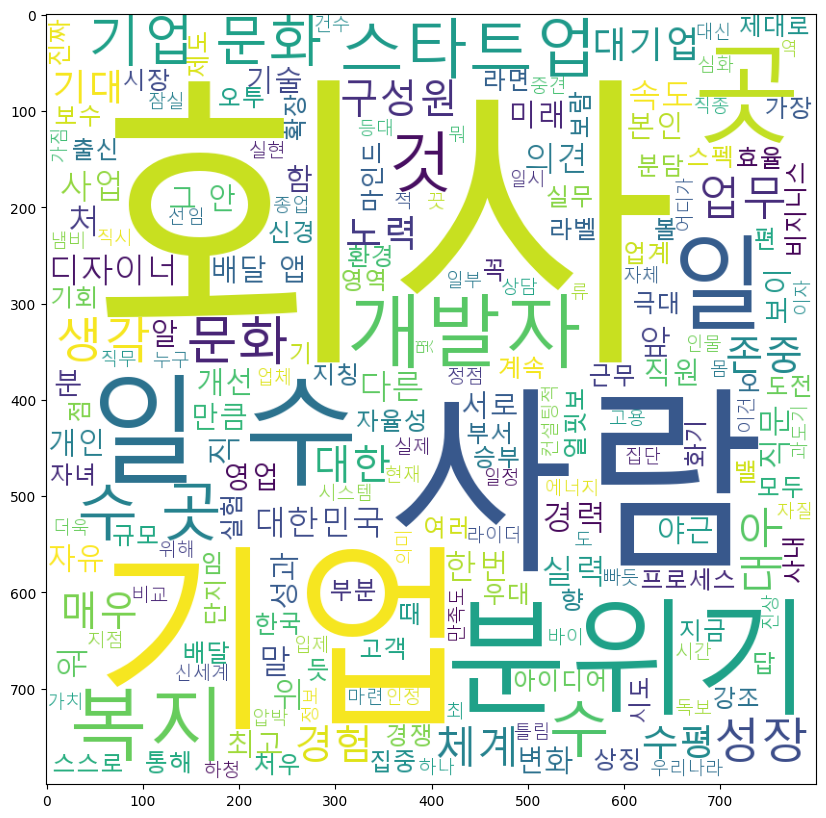

In [44]:
word_cloud_korea(df1_N2['형태소'])

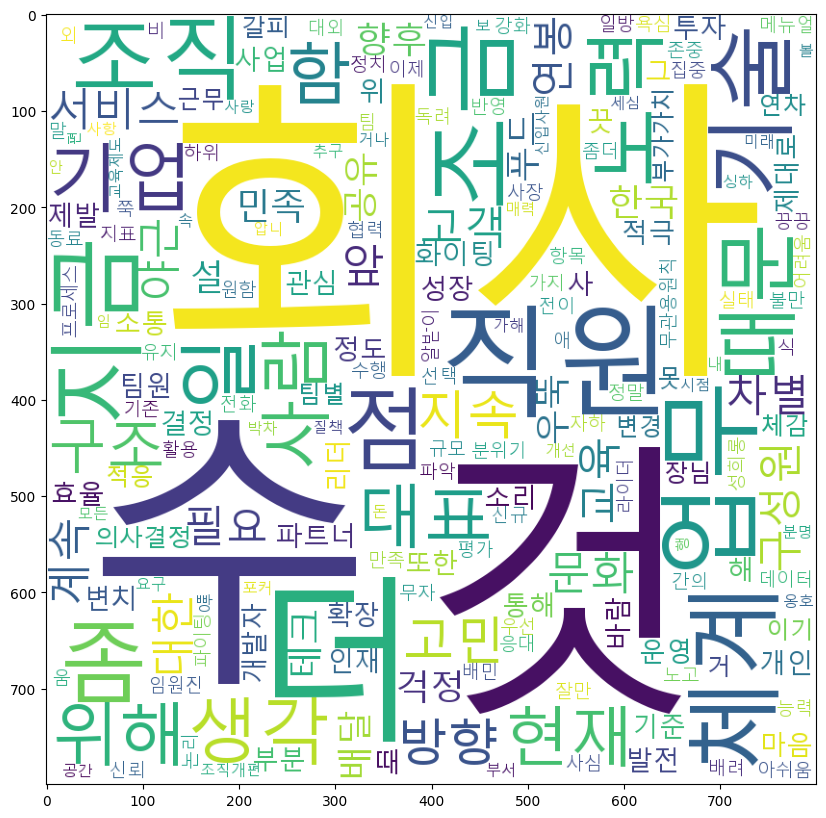

In [45]:
# 4. df1에서 '재직여부'에서 '현직자'에 해당하는 데이터만 추출하여, 
# '바라는점'이라는 항목에 대한 '명사' 워드 클라우드 생성

df1_worker = df1.loc[df1['재직여부']=='현직원']
df1_work_hope = pos_dataframe(df1_worker['바라는점'])
df1_work_N = df1_work_hope.loc[df1_work_hope['품사']=='Noun']
word_cloud_korea(df1_work_N['형태소'])

# 2. 단어 표현(Word Representation)

- 언어적인 특성을 컴퓨터가 알아들을 수 있는 형태로 변환
- Word Embedding / Word Vector ...
- 통계 기반의 자연어처리에 있어 근간이 되는 부분
- 텍스트마이닝(문장 분류 / 유사도 분석 / ...)의 선행 단계

1) One Hot Encoding 
    - 문장의 모든 요소를 0/1 변환
    - 특정 index에 대해 값이 존재하면 1 / 존재하지 않으면 0 변환
    - 장점 : 방법자체가 매우 간단 / 직관적이며 사람, 컴퓨터 이해하기가 쉽다
    - 단점 : 대량 Text에서는 벡터의 크기가 매우 커진다(시간 + 용량)
        - 단어의 존재 유무만 파악 / 의도나 특성 파악은 어렵다


In [46]:
text2 = '''그대 기억이 ~ 지난 사랑이 ~ 내 안을 파고드는 가시가 되어.
제발 가라고 흐아주 가라고'''
df_buzz = pd.DataFrame(okt.pos(text2), columns=['형태소', '품사'])

In [47]:
pd.get_dummies(df_buzz['형태소']) # (24, 20)

,\n,.,~,가,가라,가시,고,그대,기억,내,되어,사랑,아주,안,을,이,제발,지난,파고드는,흐
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


2) Countinuous Bag of Word
    - 문서 내 모든 단어를 다 모아놓은 다음, 빈도수를 바탕으로 문장을 표현
    - 장점 : 넓은 범위 (비교적 긴 문장)에 사용이 가능 / 쉽고 빠르게 구축 / 문장 특성 확인
    - 단점 : 문맥(Sematic) : 문장 내 단어의 문맥적 의미를 반영하기는 어려움
        - 단어의 순서를 고려하지 않음
        - 단어가 매우 많은경우, 희소행렬(Sparse Matrix, 불필요한 단어가 Column으로 생성)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
text4 = '''너와 함께한 시간이 모두 눈부셨다. 
            날이 좋아서, 날이 좋지 않아서, 날이 적당해서 모든 날이 좋았다.
            그리고 무슨일이 생겨도 니 잘못 아님.'''

In [50]:
from konlpy.tag import Kkma

In [51]:
sentances1 = Kkma().sentences(text4)

In [52]:
count_Vec = CountVectorizer()
x = count_Vec.fit_transform(sentances1)

In [53]:
count_Vec.get_feature_names()

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['그리고',
 '날이',
 '너와',
 '눈부셨다',
 '모두',
 '모든',
 '무슨',
 '생겨도',
 '시간이',
 '아님',
 '않아서',
 '일이',
 '잘못',
 '적당해서',
 '좋아서',
 '좋았다',
 '좋지',
 '함께']

In [54]:
x.toarray()

array([[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]],
      dtype=int64)

In [55]:
pd.DataFrame(data=x.toarray(), columns=count_Vec.get_feature_names())

,그리고,날이,너와,눈부셨다,모두,모든,무슨,생겨도,시간이,아님,않아서,일이,잘못,적당해서,좋아서,좋았다,좋지,함께
0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,4,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0
2,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0


3) Term Frequence Inverse Document Frequency (TF-IDF)
    - CBOW를 보완하기 위해 개발
    - 전체적으로 많이 등장하는 단어는 패널티를 부여 / 각 문장에 등장하는 특정 단어는 가중치를 부여하여 
    - 강조되는 단어를 찾아내게끔 문장을 표현 (확률형태로)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
text5 = '''미안하다 이거 보여주려고 어그로끌었다.. 나루토 사스케 싸움수준 ㄹㅇ실화냐? 진짜 세계관최강자들의 싸움이다.. 그찐따같던 나루토가 맞나? 진짜 나루토는 전설이다..진짜옛날에 맨날나루토봘는데 왕같은존재인 호카게 되서 세계최강 전설적인 영웅이된나루토보면 진짜내가다 감격스럽고 나루토 노래부터 명장면까지 가슴울리는장면들이 뇌리에 스치면서 가슴이 웅장해진다.. 그리고 극장판 에 카카시앞에 운석날라오는 거대한 걸 사스케가 갑자기 순식간에 나타나서 부숴버리곤 개간지나게 나루토가 없다면 마을을 지킬 자는 나밖에 없다 라며 바람처럼 사라진장면은 진짜 나루토처음부터 본사람이면 안울수가없더라 진짜 너무 감격스럽고 보루토를 최근에 알았는데 미안하다.. 지금20화보는데 진짜 나루토세대나와서 너무 감격스럽고 모두어엿하게 큰거보니 내가 다 뭔가 알수없는 추억이라해야되나 그런감정이 이상하게 얽혀있다.. 시노는 말이많아진거같다 좋은선생이고..그리고 보루토왜욕하냐 귀여운데 나루토를보는것같다 성격도 닮았어 그리고버루토에 나루토사스케 둘이싸워도 이기는 신같은존재 나온다는게 사실임?? 그리고인터닛에 쳐봣는디 이거 ㄹㅇㄹㅇ 진짜팩트냐?? 저적이 보루토에 나오는 신급괴물임?ㅡ 나루토사스케 합체한거봐라 진짜 ㅆㅂ 이거보고 개충격먹어가지고 와 소리 저절로 나오더라 ;; 진짜 저건 개오지는데.. 저게 ㄹㅇ이면 진짜 꼭봐야돼 진짜 세계도 파괴시키는거아니야 .. 와 진짜 나루토사스케가 저렇게 되다니 진짜 눈물나려고했다.. 버루토그라서 계속보는중인데 저거 ㄹㅇ이냐..? 하.. ㅆㅂ 사스케 보고싶다..  진짜언제 이렇게 신급 최강들이 되었을까 옛날생각나고 나 중딩때생각나고 뭔가 슬프기도하고 좋기도하고 감격도하고 여러가지감정이 복잡하네.. 아무튼 나루토는 진짜 애니중최거명작임..'''

In [58]:
sentances2 = Kkma().sentences(text5) # 문장 분리
sentances2

['미안 하다 이거 보여주려고 어 그로 끌었다.. 나루토 사스케 싸움수준 ㄹ ㅇ 실화냐?',
 '진짜 세계관 최강자들의 싸움이다.. 그 찐 따 같던 나루토가 맞나?',
 '진짜 나루토는 전설이다.. 진짜 옛날에 맨날 나루토 봘 는데 왕 같은 존재인 호 카게 되 서 세계 최강 전설적인 영웅이 된 나루토 보면 진짜 내가다 감격스럽고 나루토 노래부터 명장면까지 가슴 울리는 장면들이 뇌리에 스치면서 가슴이 웅장 해진다.. 그리고 극장 판 에 카 카시 앞에 운석 날라오는 거대한 걸 사스케가 갑자기 순식간에 나타나서 부숴 버리곤 개간 지나게 나루토가 없다면 마을을 지킬 자는 나밖에 없다 라며 바람처럼 사라진 장면은 진짜 나루토 처음부터 본 사람이면 안 울 수가 없더라',
 '진짜 너무 감격스럽고 보루 토를 최근에 알았는데 미안 하다.. 지금 20 화 보는데 진짜 나루토세대 나와서 너무 감격스럽고 모두 어엿하게 큰 거 보니 내가 다 뭔 가 알 수 없는 추억이라 해야 되나 그런 감정이 이상하게 얽혀 있다.. 시노는 말이 많아 진 거 같다 좋은 선생이고.. 그리고 보루 토 왜 욕하냐',
 '귀여운데 나루토를 보는 것 같다 성격도 닮았어',
 '그리고버루토에 나루토 사스케 둘이 싸워도 이기는 신 같은 존재 나온다는 게 사실 임?? 그리고 인터 닛에 쳐 봣 는 디 이거 ㄹ ㅇ ㄹ ㅇ 진짜 팩 트냐??',
 '저 적이 보루 토에 나오는 신 급 괴물 임? ㅡ 나루토 사스케 합체한 거 봐라 진짜 ㅆ ㅂ 이거보고 개 충격 먹어 가지고 와 소리 저절로 나오더라 ;;',
 '진짜 저건 개 오지는데.. 저게 ㄹ ㅇ이면 진짜 꼭 봐야 돼 진짜 세계도 파괴시키는 거 아니야 ..',
 '와 진짜 나루토 사스케가 저렇게 되다니',
 '진짜 눈물나려고 했다.. 버루토그라서 계속 보는 중인데 저 거 ㄹ ㅇ이냐..?',
 '하.. ㅆ ㅂ 사스케 보고 싶다.. 진짜 언제 이렇게 신 급 최강들이 되었을까',
 '옛날 생각나고 나 중 딩 때 생각나고 뭔 가 슬프기도 하고 좋기도 하고 감격도 하고 여러 가지 감

In [59]:
tfidf_Vec = TfidfVectorizer()
x = tfidf_Vec.fit_transform(sentances2)

In [60]:
pd.DataFrame(data=x.toarray(), columns=tfidf_Vec.get_feature_names())

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,20,ㅇ이냐,ㅇ이면,가슴,가슴이,가지,가지고,감격도,감격스럽고,감정이,...,토를,토에,트냐,파괴시키는,하고,하다,합체한,해야,해진다,했다
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.303024,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.126557,0.126557,0.000000,0.000000,0.000000,0.109138,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126557,0.000000
3,0.157683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271960,0.135980,...,0.157683,0.000000,0.000000,0.000000,0.000000,0.135980,0.000000,0.157683,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.276105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260034,0.000000,0.000000,0.000000,...,0.000000,0.260034,0.000000,0.000000,0.000000,0.000000,0.260034,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.322789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.322789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.380111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380111


# 3. 문장 표현(Sentance Representation)

- 여러 문장에 대한 텍스트 분류에서 많이 사용 / 단어의 의미와 맥락을 일일히 파악할 필요없이 분류모델을 구성할 때 주로 사용
- Text to Sequence : 문자를 Sequence로 표현 / 문장 내 여러 단어를 정수로 표현
- Padding : 텍스트 길이에 따라 Vector 크기가 달라짐 
    - 이를 맞춰주기 위해 가장자리까지 0값으로 채워넣는 작업
    - 전통적 기계학습 같은 모델을 쓸 때 필수적인 작업
    

In [61]:
# 0 '나는 고양이를 좋아해 0000000000000000000'
# 1 '고양이 츄르를 좋아해 고양이 츄르를 좋아해'

In [62]:
!pip install tensorflow

In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [64]:
tts_model = Tokenizer()
tts_model.fit_on_texts(df1['한줄평'])

In [65]:
text_seq = tts_model.texts_to_sequences(df1['한줄평'])
text_seq

[[90, 50, 91, 92, 51, 29, 93, 94, 16, 52, 53, 95, 16],
 [96, 97, 98, 99, 100, 101, 102, 1, 3, 4, 2],
 [19, 30, 7, 1, 43, 103, 20],
 [21,
  4,
  2,
  265,
  11,
  266,
  3,
  267,
  268,
  12,
  269,
  104,
  4,
  44,
  13,
  54,
  7,
  1,
  3,
  4,
  105],
 [90, 50, 91, 92, 51, 29, 93, 94, 16, 52, 53, 95, 16],
 [270,
  106,
  271,
  45,
  55,
  12,
  31,
  272,
  273,
  274,
  107,
  275,
  276,
  277,
  278,
  108,
  279,
  12,
  280,
  281,
  109,
  110,
  282,
  56,
  57,
  283,
  6,
  284,
  285,
  286,
  287,
  288,
  289,
  290,
  291,
  58,
  292,
  293],
 [106,
  294,
  107,
  32,
  295,
  296,
  297,
  111,
  298,
  299,
  12,
  300,
  301,
  9,
  112,
  302,
  303,
  304],
 [19, 30, 7, 1, 43, 103, 20],
 [96, 97, 98, 99, 100, 101, 102, 1, 3, 4, 2],
 [305, 16, 3, 2, 59, 306, 307, 33, 2],
 [113, 308, 309, 310, 108, 311, 114, 115],
 [34, 1, 3, 23, 35, 24, 312, 116, 313, 314, 5],
 [315, 316, 17, 34, 1, 3, 317, 318, 319],
 [117, 118, 7, 1, 3, 5, 320, 119, 321, 322, 120, 1, 14],
 [6

In [66]:
tts_model.word_index

{'수': 1,
 '회사': 2,
 '있는': 3,
 '좋은': 4,
 '곳': 5,
 '기업': 6,
 '일할': 7,
 '분위기': 8,
 '회사가': 9,
 '다양한': 10,
 '잘': 11,
 '매우': 12,
 '함께': 13,
 '있다': 14,
 '젊은': 15,
 '성장하고': 16,
 '많이': 17,
 '다른': 18,
 '개발자가': 19,
 '좋음': 20,
 '일하기': 21,
 '문화를': 22,
 '것이': 23,
 '하지만': 24,
 '많은': 25,
 '복지가': 26,
 '할': 27,
 '젊고': 28,
 '스타트업의': 29,
 '대우받으며': 30,
 '좋고': 31,
 '자유롭고': 32,
 '하는': 33,
 '배울': 34,
 '많음': 35,
 '스타트업': 36,
 '만큼': 37,
 '자유로운': 38,
 '사람들이': 39,
 '대한': 40,
 '분위기가': 41,
 '회사를': 42,
 '있는곳': 43,
 '사람들과': 44,
 '개발자': 45,
 '의견을': 46,
 '수평적인': 47,
 '일을': 48,
 'it': 49,
 '빠른': 50,
 '대한민국': 51,
 '그': 52,
 '안에서': 53,
 '즐겁게': 54,
 '대우가': 55,
 '있어서': 56,
 '서로': 57,
 '미래가': 58,
 '구성원들을': 59,
 '열린회사': 60,
 '많다': 61,
 '통해': 62,
 '배달앱': 63,
 '복지와': 64,
 '생각보다': 65,
 '본인이': 66,
 '사내': 67,
 '노력하는': 68,
 '대기업': 69,
 '대우를': 70,
 '복지도': 71,
 '가는': 72,
 '있음': 73,
 '문화': 74,
 '있지만': 75,
 '싶은': 76,
 '기업문화를': 77,
 '외부에서': 78,
 '정말': 79,
 '비해': 80,
 '있으나': 81,
 '받으며': 82,
 '성장이': 83,
 '기대되는': 84,
 '배우고': 85,
 '복지': 86,

In [67]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [68]:
pad_sequences(text_seq, maxlen=30) # maxlen : 문장의 최대길이

array([[   0,    0,    0, ...,   53,   95,   16],
       [   0,    0,    0, ...,    3,    4,    2],
       [   0,    0,    0, ...,   43,  103,   20],
       ...,
       [   0,    0,    0, ...,   58,  263,    5],
       [   0,    0,    0, ..., 1002, 1003, 1004],
       [   0,    0,    0, ...,  264, 1013, 1014]])

In [69]:
pad_sequences(text_seq, maxlen=30, padding='post') # padding옵션을 주면 0을 뒤에 채워넣을 수 있다

array([[  90,   50,   91, ...,    0,    0,    0],
       [  96,   97,   98, ...,    0,    0,    0],
       [  19,   30,    7, ...,    0,    0,    0],
       ...,
       [  32,  992,    8, ...,    0,    0,    0],
       [ 262,  993,  994, ...,    0,    0,    0],
       [1005,   33,  172, ...,    0,    0,    0]])

# 4. 텍스트 분류

In [70]:
df_good_com = df1[['기업장점']].rename(columns={'기업장점':'기업평가'})
df_bad_com = df1[['기업단점']].rename(columns={'기업단점':'기업평가'})

In [71]:
df_good_com['label'] = 1
df_bad_com['label'] = 0

In [72]:
df2 = pd.concat([df_good_com, df_bad_com]).reset_index() # 인덱스 중복을 제거
df2['label'].value_counts()

1    152
0    152
Name: label, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [74]:
X = df2[['기업평가']]
Y = df2[['label']]

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

- 불용어 처리 (특수기호 처리)
- Text to Sequence / Padding

In [76]:
import re

In [77]:
# 불용어 제거
def text_remove_stopword(i):
    review_text = re.sub('[!1+(),.@#\n2]345?','', i) # 불용어를 제거
    word_text = okt.morphs(review_text, stem=True) # 형태소 분석
    
    return word_text

In [78]:
X_train_list = []
X_test_list = []

In [79]:
for i in X_train['기업평가'] : 
    if type(i)==str : # 글로 평가가 작성된 데이터들은 아래의 불용어 처리함수 실행
        X_train_list.append(text_remove_stopword(i))
    else : 
        X_train_list.append([])

In [80]:
for i in X_test['기업평가'] : 
    if type(i)==str : # 글로 평가가 작성된 데이터들은 아래의 불용어 처리함수 실행
        X_test_list.append(text_remove_stopword(i))
    else : 
        X_test_list.append([])

In [81]:
# Text to Sequence / Padding
tts_Vec = Tokenizer()
tts_Vec.fit_on_texts(X_train_list)

train_sequence = tts_Vec.texts_to_sequences(X_train_list)
test_sequence = tts_Vec.texts_to_sequences(X_test_list)

In [82]:
# 문장 뒤에 0으로 길이가 50되도록 채워넣기
train_input = pad_sequences(train_sequence, padding='post', maxlen=50)
test_input = pad_sequences(test_sequence, padding='post', maxlen=50)

In [83]:
!pip install --user imblearn

In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [85]:
preprocessing_pipe = make_pipeline(KNNImputer(), MinMaxScaler())
model_pipe = make_pipeline(preprocessing_pipe, RandomForestClassifier())

In [86]:
hyper_parameter = {'randomforestclassifier__max_depth':range(5,11),
                   'randomforestclassifier__min_samples_split':range(5,11),
                   'randomforestclassifier__criterion':['gini','entropy']}

grid_model = GridSearchCV(model_pipe, param_grid=hyper_parameter
                        , cv=5, n_jobs=-1, scoring='f1')
grid_model.fit(train_input, Y_train)

c:\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('knnimputer',
                                                         KNNImputer()),
                                                        ('minmaxscaler',
                                                         MinMaxScaler())])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': range(5, 11),
                         'randomforestclassifier__min_samples_split': range(5, 11)},
             scoring='f1')

In [87]:
best_model = grid_model.best_estimator_

In [88]:
Y_train_pred = best_model.predict(train_input)
Y_test_pred = best_model.predict(test_input)

In [89]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       113

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [90]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59        37
           1       0.60      0.54      0.57        39

    accuracy                           0.58        76
   macro avg       0.58      0.58      0.58        76
weighted avg       0.58      0.58      0.58        76



# Mission 2
- df1 데이터를 이용해 아래의 미션을 수행하고자 한다.
1) '작성시간'데이터를 '작성시간_dt'변수로 날짜데이터로 변환하여 선언
2) '재직여부'에서 '전직원'들이 가장 많이 리뷰를 남긴 연도를 확인
3) '직종'중 가장 빈도수가 높은 2 직종을 추출하여, df1_top으로 선언한 뒤, df1_top에서 '한줄평'에 대한 '명사'를 워드클라우드로 시각화 -> image.png 파일로 저장

- company_Train_data.csv 데이터를 불러와 아래의 미션을 수행하고자 한다.
1) 해당 데이터를 df3로 불러와, 한줄평에 따른 '기업성장여부'를 분류하는 분류모델을 구성
    - 문장표현을 활용(Text to Sequence / Padding)
    - GradientBoosting Model
    - Robust Scaling 
    - hyper_parameter = {}
    
2) 앞서 만든 분류모델을 model_nlp.sav 파일로 저장
3) company_Test_data.csv를 불러와 df3_test로 선언한 뒤, 앞서 만든 모델에 넣어 '기업성장여부' 빈도수 확인

In [91]:
df1['재직여부']

0      현직원
1      현직원
2      현직원
3      전직원
4      현직원
      ... 
147    현직원
148    현직원
149    현직원
150    현직원
151    현직원
Name: 재직여부, Length: 152, dtype: object

In [92]:
# - df1 데이터를 이용해 아래의 미션을 수행하고자 한다.
# 1) '작성시간'데이터를 '작성시간_dt'변수로 날짜데이터로 변환하여 선언
df1['작성시간_dt'] = pd.to_datetime(df1['작성시간'])
df1['연도'] = df1['작성시간_dt'].dt.year
df1['월'] = df1['작성시간_dt'].dt.month
df1.head(3)

,Unnamed: 0,직종,재직여부,지역,작성시간,한줄평,기업장점,기업단점,바라는점,기업성장여부,기업추천여부,작성시간_dt,연도,월
0,0,경영/기획/컨설팅,현직원,서울,2019. 01. 03,"""무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...","1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",빠르게 성장하는회사의 특징! 바뀌는 업무가 많습니다. 하루하루 다이나믹해요.,향후 회사가 어떤 방향으로 성장해야 할지 지속적으로 고민하시고 공유해주셔서 감사합니...,성장,추천,2019-01-03,2019,1
1,1,경영/기획/컨설팅,현직원,서울,2019. 03. 08,"""체계적인 업무분담으로 자율성을 강조하며 사내분위기로 실무를 극대화할 수 있는 좋은...","그 누구의 눈치도 보지 않으며, 자유로운 의사소통에 내부 분위기, 팀별로 케바케 이...","팀별로 케바케, 외근 및 인테리어관련 부서는 낮과 밤이 없어보이지만 그들에게도 얼굴...","너무 좋아서 변하지 않을까 걱정이 됩니다\n지금처럼 고객, 파트너사, 직원들을 생각...",성장,추천,2019-03-08,2019,3
2,2,인사/총무,현직원,서울,2019. 01. 25,"""개발자가 대우받으며 일할 수 있는곳, 워라밸 좋음""","도서구입비 무제한 지원, 주 35시간 근무, 월요일은 오후1시 출근,",아직 커가는 회사라서 이것저것 세팅해 나가는 단계. 그러나 세팅해 나갈때에도 경쟁사...,없다. 비전이 뚜렷하고 가고자하는 방향이 있어 좋음.,성장,추천,2019-01-25,2019,1


In [93]:
# 2) '재직여부'에서 '전직원'들이 가장 많이 리뷰를 남긴 연도를 확인
df1.loc[df1['재직여부']=='전직원']['연도'].value_counts()

2019    32
2018    27
2017    15
2016     8
2020     5
2015     3
Name: 연도, dtype: int64

In [94]:
# 3) '직종'중 가장 빈도수가 높은 2 직종을 추출하여, df1_top으로 선언한 뒤, 
# df1_top에서 '한줄평'에 대한 '명사'를 워드클라우드로 시각화 -> image.png 파일로 저장
df1_top = df1['직종'].value_counts().head(2).index.tolist()
df1_top


['IT/인터넷', '영업/제휴']

In [95]:
# '한줄평'을 형태소 분석하여, '명사'에 대한 워드클라우드 생성

def pos_dataframe(data) :
    df_POS = pd.DataFrame()
    for i in range(0, len(data)) : 
        dfn = pd.DataFrame(okt.pos(data.values.tolist()[i]))
        df_POS = pd.concat([df_POS, dfn])
        
    return df_POS.rename(columns={0:'형태소', 1:'품사'})

In [96]:
df1_eval = df1.loc[df1['직종'].isin(df1_top)]

df1_N = pos_dataframe(df1_eval['한줄평'])
df1_N2 = df1_N.loc[(df1_N['품사'] == 'Noun')]

In [97]:
def word_cloud_korea(data) : 
    wc_img = WordCloud(background_color='white', width=800, height=800,
            font_path='C:/Windows/Fonts/malgun.ttf').generate(' '.join(data))

    plt.figure(figsize=[10,10])
    plt.imshow(wc_img)
    plt.show()

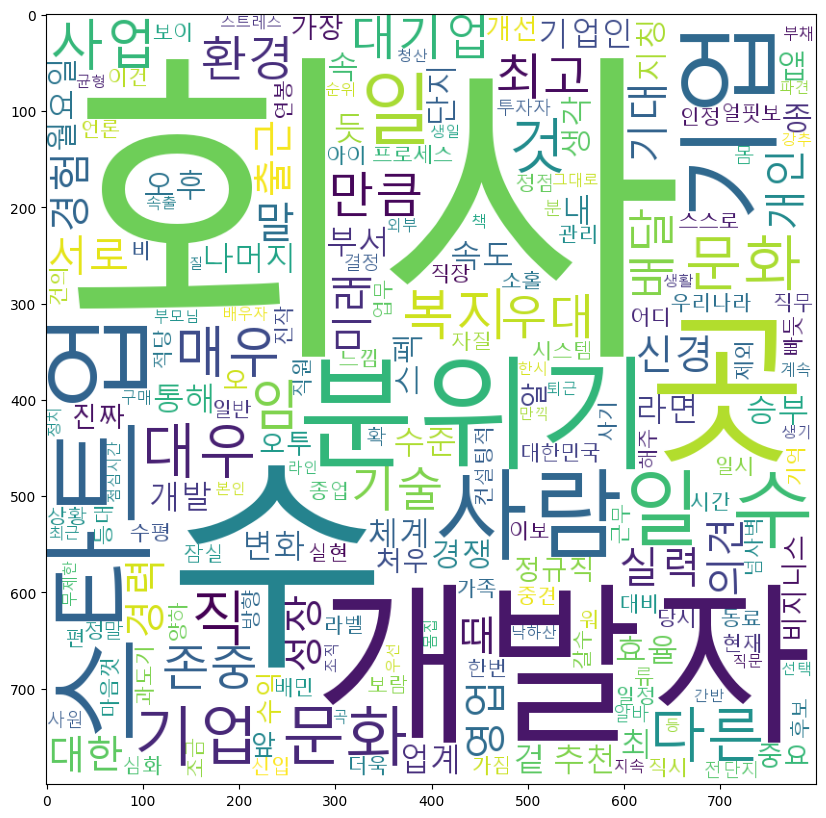

In [98]:
word_cloud_korea(df1_N2['형태소'])

In [99]:
plt.savefig('image.png')

<Figure size 640x480 with 0 Axes>

In [100]:
# - company_Train_data.csv 데이터를 불러와 아래의 미션을 수행하고자 한다.

In [101]:
# 1) 해당 데이터를 df3로 불러와, 한줄평에 따른 '기업성장여부'를 분류하는 분류모델을 구성
#     - 문장표현을 활용(Text to Sequence / Padding)
#     - GradientBoosting Model
#     - Robust Scaling 
#     - hyper_parameter = {}

df3 = pd.read_csv('company_Train_data.csv')
df3.head(3)

,Unnamed: 0,한줄평,기업성장여부
0,0,"1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",성장
1,1,"그 누구의 눈치도 보지 않으며, 자유로운 의사소통에 내부 분위기, 팀별로 케바케 이...",성장
2,2,"도서구입비 무제한 지원, 주 35시간 근무, 월요일은 오후1시 출근,",성장


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
X = df3[['한줄평']]
Y = df3[['기업성장여부']]

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

In [105]:
import re

In [106]:
# 불용어 제거
def text_remove_stopword(i):
    review_text = re.sub('[!1+(),.@#\n2]345?','', i) # 불용어를 제거
    word_text = okt.morphs(review_text, stem=True) # 형태소 분석
    
    return word_text

In [107]:
X_train_list = []
X_test_list = []

In [108]:
for i in X_train['한줄평'] : 
    if type(i)==str : # 글로 평가가 작성된 데이터들은 아래의 불용어 처리함수 실행
        X_train_list.append(text_remove_stopword(i))
    else : 
        X_train_list.append([])

In [109]:
for i in X_test['한줄평'] : 
    if type(i)==str : # 글로 평가가 작성된 데이터들은 아래의 불용어 처리함수 실행
        X_test_list.append(text_remove_stopword(i))
    else : 
        X_test_list.append([])

In [110]:
# Text to Sequence / Padding
tts_Vec = Tokenizer()
tts_Vec.fit_on_texts(X_train_list)

train_sequence = tts_Vec.texts_to_sequences(X_train_list)
test_sequence = tts_Vec.texts_to_sequences(X_test_list)

In [111]:
# 문장 뒤에 0으로 길이가 50되도록 채워넣기
train_input = pad_sequences(train_sequence, padding='post', maxlen=50)
test_input = pad_sequences(test_sequence, padding='post', maxlen=50)

In [112]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.impute import KNNImputer

In [113]:
preprocessing_pipe = make_pipeline(KNNImputer(), RobustScaler())
model_pipe = make_pipeline(preprocessing_pipe, GradientBoostingClassifier())

In [114]:
grid_model = GridSearchCV(model_pipe, param_grid={}
                        , cv=5, n_jobs=-1, scoring='f1')
grid_model.fit(train_input, Y_train)

c:\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('knnimputer',
                                                         KNNImputer()),
                                                        ('robustscaler',
                                                         RobustScaler())])),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1, param_grid={}, scoring='f1')

In [115]:
best_model = grid_model.best_estimator_

In [116]:
Y_train_pred = best_model.predict(train_input)
Y_test_pred = best_model.predict(test_input)

In [117]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

          성장       1.00      1.00      1.00       113
          정체       1.00      1.00      1.00       115

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [118]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

          성장       0.65      0.56      0.60        39
          정체       0.60      0.68      0.63        37

    accuracy                           0.62        76
   macro avg       0.62      0.62      0.62        76
weighted avg       0.62      0.62      0.62        76



In [119]:
# 2) 앞서 만든 분류모델을 model_nlp.sav 파일로 저장

# 모델 저장
import pickle   # Python 객체들을 하나의 파일로 변환
pickle.dump(model_pipe, open('model_nlp.sav','wb'))

In [120]:
# 3) company_Test_data.csv를 불러와 df3_test로 선언한 뒤, 앞서 만든 모델에 넣어 '기업성장여부' 빈도수 확인
df3_test = pd.read_csv('company_Test_data.csv')

In [121]:
df3_test.head()

,Unnamed: 0,한줄평
0,0,"""무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안..."
1,1,"""체계적인 업무분담으로 자율성을 강조하며 사내분위기로 실무를 극대화할 수 있는 좋은..."
2,2,"""개발자가 대우받으며 일할 수 있는곳, 워라밸 좋음"""
3,3,"""일하기 좋은 회사. 누구라도 잘 알고 있는 회사인만큼 실제로도 매우 만족스러운 회..."
4,4,"""무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안..."


In [125]:
# model = pickle.load(open('model_nlp.sav', 'rb'))
# model.fit(df3_test[['한줄평']])
# model.predict(df3_test[['한줄평']])

## 강사님풀이

In [126]:
# 1
df3 = pd.read_csv('company_Train_data.csv')

In [127]:
Y = df3['기업성장여부'].replace({'성장':1, '정체':0})
X = df3[['한줄평']]

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

In [134]:
# 불용어 처리함수
import konlpy as kp
import re
def text_remove_stopword(i) :
    review_text = re.sub('[!1+(),.@#2345]?\n', '', i)
    word_text = kp.tag.Okt().morphs(review_text, stem=True)
    return word_text

In [135]:
X_train_list = []
X_test_list = []

In [136]:
for i in X_train['한줄평'] : 
    if type(i)==str : 
        X_train_list.append(text_remove_stopword(i))
    else : 
        X_train_list.append([])
        
for i in X_test['한줄평'] : 
    if type(i)==str : 
        X_test_list.append(text_remove_stopword(i))
    else : 
        X_test_list.append([])

In [137]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [140]:
# Text to Seq / Padding
tts_Vec = Tokenizer()
tts_Vec.fit_on_texts(X_train_list)

train_Seq = tts_Vec.texts_to_sequences(X_train_list)
test_Seq = tts_Vec.texts_to_sequences(X_test_list)

In [141]:
train_input = pad_sequences(train_Seq, padding='post', maxlen=50)
test_input = pad_sequences(test_Seq, padding='post', maxlen=50)

In [142]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [146]:
model_pipe = make_pipeline(RobustScaler(), GradientBoostingClassifier())
hyper_parameter = {}
grid_model = GridSearchCV(model_pipe, param_grid=hyper_parameter, cv=5, n_jobs=-1)
grid_model.fit(train_input, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1, param_grid={})

In [147]:
best_model = grid_model.best_estimator_

In [148]:
import pickle
pickle.dump(best_model, open('model_nlp.sav', 'wb'))

In [149]:
# 3
df3_test = pd.read_csv('company_Test_data.csv')
X_new = df3_test[['한줄평']]

In [156]:
def input_nlp_preprocess(data) : 
    X_new_list = []
    for i in data['한줄평'] : 
        if type(i)==str : 
            X_new_list.append(text_remove_stopword(i))
        else : 
            X_new_list.append([])
        
    new_seq = tts_Vec.texts_to_sequences(X_new_list)
    new_input = pad_sequences(new_seq, padding='post', maxlen=50)
    return new_input

In [157]:
new_input = input_nlp_preprocess(df3_test[['한줄평']])

In [158]:
best_model.predict(new_input)

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [159]:
df3_test['분류값'] = best_model.predict(new_input)

<AxesSubplot:xlabel='분류값', ylabel='count'>

c:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
c:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  func(*args, **kwargs)
c:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  func(*args, **kwargs)
c:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canva

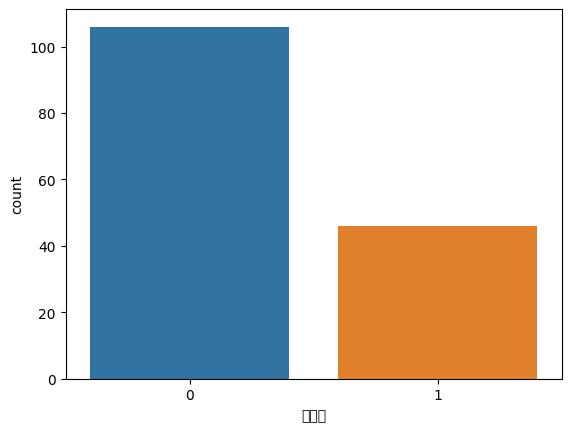

In [160]:
sns.countplot(data=df3_test, x='분류값')

In [161]:
df3_test['분류값'].value_counts()

0    106
1     46
Name: 분류값, dtype: int64